# Create balanced training dataset

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_pickle("data/dataset_master_multiclass_numpy_array_encoded_pickled")

In [8]:
df_train, df_validation = train_test_split(df, test_size=0.33, random_state=42, st)

### Show  distribution of classes in training set

In [24]:
df_train.reset_index(drop=True, inplace=True)

In [177]:
print(df_train.shape)
df_train.head()

(2543, 2)


KEGG_ID                                             labels
0  D06670  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1  D06407  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2  D07394  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3  D02245  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4  D01285  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

In [103]:
class_counts = df_train.iloc[:,1].sum()
classes = ['S'+str(i) for i in range(1,15)]

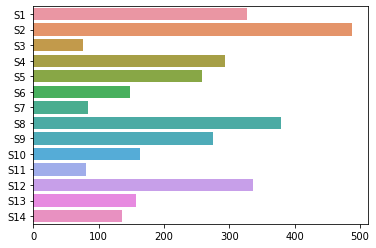

In [123]:
plot_class_balance(class_counts, classes)

In [156]:
def plot_class_balance(class_counts, classes):
    sns.barplot(class_counts, classes)

In [157]:
def measure_imbalance(class_counts):
    n = sum(class_counts)
    entropy = -sum([count/n * np.log(count/n) for count in class_counts])
    entropy = entropy/np.log(len(class_counts))
    #print(n, entropy)
    return entropy

In [204]:
def balance_dataset(data, data_new = 0, iterations = 100, verbose = 1):
    
    if not type(data_new) == pd.core.frame.DataFrame:
        data_new = data.copy()
    print(data_new.shape)
    
    class_counts = data_new.iloc[:,1].sum()
    plot_class_balance(class_counts, ['S'+str(i) for i in range(1,15)])
    for _ in range(iterations):
        if verbose and not _%1000:
            print("step {}/{}".format(_, iterations))
            print(data_new.shape)
        i = np.random.randint(0,data.shape[0])
        # get random record
        to_add = data.iloc[i,:]
        class_counts = data_new.iloc[:,1].sum()
        if measure_imbalance(class_counts) < measure_imbalance(class_counts + to_add[1]):
            data_new.loc[len(data_new)] =  to_add
    print(data_new.shape)
    plot_class_balance(class_counts, ['S'+str(i) for i in range(1,15)])
    return data_new

(2543, 2)
step 0/10000
(2543, 2)
step 1000/10000
(2861, 2)
step 2000/10000
(3153, 2)
step 3000/10000
(3430, 2)
step 4000/10000
(3691, 2)
step 5000/10000
(3908, 2)
step 6000/10000
(4047, 2)
step 7000/10000
(4200, 2)
step 8000/10000
(4321, 2)
step 9000/10000
(4416, 2)
(4592, 2)


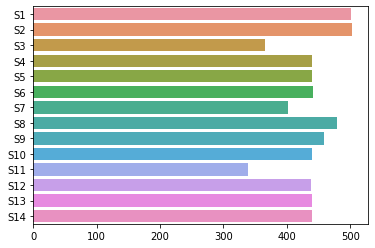

In [189]:
df_train_balanced = balance_dataset(df_train, iterations=10000)

(4592, 2)
step 0/2500
(4592, 2)
step 1000/2500
(4735, 2)
step 2000/2500
(4920, 2)
(4989, 2)


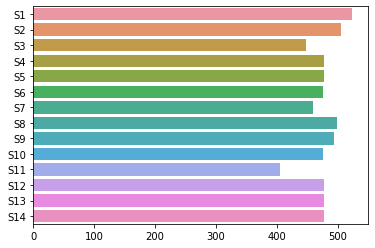

In [205]:
df_train_balanced_2 = balance_dataset(df_train, data_new=df_train_balanced, iterations=2500)

(4989, 2)
step 0/2500
(4989, 2)
step 1000/2500
(5139, 2)
step 2000/2500
(5246, 2)
(5333, 2)


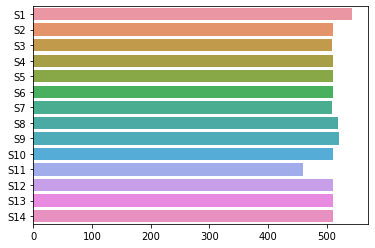

In [206]:
df_train_balanced_3 = balance_dataset(df_train, data_new=df_train_balanced_2, iterations=2500)

(5604, 2)
step 0/4000
(5604, 2)
step 1000/4000
(5701, 2)
step 2000/4000
(5814, 2)
step 3000/4000
(5814, 2)
(5814, 2)


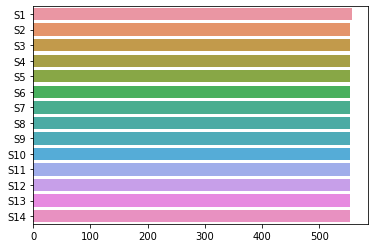

In [208]:
df_train_balanced_4 = balance_dataset(df_train, data_new=df_train_balanced_3, iterations=4000)

In [211]:
df_train_balanced_4.to_pickle("data/data_train_balanced")
df_validation.to_pickle("data/data_val_balanced")